## Problem Statement:
### Multi-Linear and Polynomial Regression on the Energy Efficiency Dataset to predict the heating load (y1) of buildings.

In [2]:
%matplotlib inline

In [3]:
# import all necessary libraries 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  ● Load the Energy Efficiency dataset using the pandas library.
### ● Dataset Name: Energy Dataset

In [5]:
EnergyEfficiencyDataFrame = pd.read_csv("data/Energy Dataset.csv") # Read csv file

In [6]:
EnergyEfficiencyDataFrame.head(5) # fetch top 5 rows

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [7]:
EnergyEfficiencyDataFrame.describe() # describe dataset in terms of Mean, std, and Quartile vales

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [8]:
EnergyEfficiencyDataFrame.info() # display info about dataset, such as non null values or datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X1            768 non-null    float64
 1   X2            768 non-null    float64
 2   X3            768 non-null    float64
 3   X4            768 non-null    float64
 4   X5            768 non-null    float64
 5   X6            768 non-null    int64  
 6   X7            768 non-null    float64
 7   X8            768 non-null    int64  
 8   Heating Load  768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### ● Apply necessary preprocessing steps on the dataset, such as handling missing values, scaling features, or encoding categorical variables if required.

In [9]:
# this dataset does not contains any null value,, 
# so it is not necessary to implement any null values handling method....

In [10]:
# Moreover, this dataset does not contains any categorical column, 
# thus it is not necessary to implement label encoding as well...

In [11]:
EnergyEfficiencyDataFrame.isnull().sum() # display sum of null values

X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
Heating Load    0
dtype: int64

In [12]:
# i have tried to implement features scaling using standard scaler. 
# However, There was significent drop in accuracy of model after implementing Standarization 
# thus, the original dataset is highly accurate... 

### ● Separate the features (X) and the target variable (y: heating load) from the dataset

In [13]:
EnergyEfficiencyDataFrame.columns # display all columns names of Dataframe

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Heating Load'], dtype='object')

In [14]:
# fetch independent columns and pass them to X variable 
# which i will later use it for futher spliting in training and testing.
X_EEDF = EnergyEfficiencyDataFrame[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
X_EEDF

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [15]:
# fetch dependent variable from dataframe and Assign it to Y variable..
# which i will later use it for futher spliting in training and testing.
Y_EEDF = EnergyEfficiencyDataFrame['Heating Load']
Y_EEDF

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating Load, Length: 768, dtype: float64

### ● Split the dataset into training and testing sets using an 80:20 ratio.

In [16]:
# split the upper declared variable into training and testing data
X_train_EEDF,X_test_EEDF,y_train_EEDF,y_test_EEDF = train_test_split(X_EEDF,
                                                                     Y_EEDF, 
                                                                     test_size=0.2)

In [17]:
X_train_EEDF.shape # print rows and columns count of training dataset 

(614, 8)

In [18]:
X_test_EEDF.shape # print rows and columns count of testing dataset 

(154, 8)

### ●. Perform multi-linear regression:

● Fit a multi-linear regression model to the training data using the
LinearRegression class from the sklearn.linear_model module.

● Predict the heating load for the testing data using the trained model.

● Evaluate the performance of the model by calculating metrics such as mean
squared error (MSE) and coefficient of determination (R^2).

● Print the MSE and R^2 values to assess the model's accuracy

In [19]:
Ml_reg_obj = LinearRegression() # create model object

In [20]:
Ml_reg_obj.fit(X_train_EEDF,y_train_EEDF) # then fit training X and Y values to model object

LinearRegression()

In [21]:
y_pred_multi = Ml_reg_obj.predict(X_test_EEDF) # predict the Y test values beasd X test values

In [22]:
# print performance of regression model
print(f'The accuracy in r2_score is {r2_score(y_test_EEDF,y_pred_multi)}')
# for checking the error we will use either mean_Squared_error or mean_absolute_error
print(f"The mse is {mean_squared_error(y_pred_multi,y_test_EEDF)}")
print(f"The mae is {mean_absolute_error(y_pred_multi,y_test_EEDF)}")

The accuracy in r2_score is 0.9110345794403927
The mse is 8.84962336322865
The mae is 2.1139833701039814


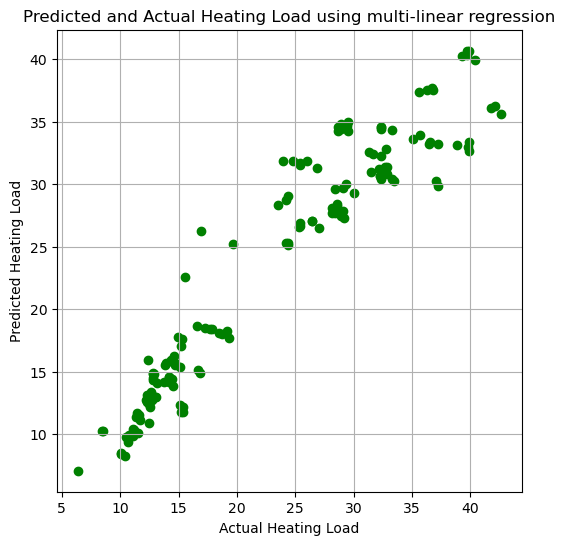

In [23]:
# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test_EEDF, y_pred_multi, color='green')
plt.title('Predicted and Actual Heating Load using multi-linear regression')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.grid(True)

### ● Perform polynomial regression:
    
● Use the PolynomialFeatures class from the sklearn.preprocessing module to
transform the features into polynomial features.

● Fit a polynomial regression model to the training data using the
LinearRegression class.

● Predict the heating load for the testing data using the trained polynomial
regression model.

● Evaluate the performance of the model by calculating MSE and R^2.

● Print the MSE and R^2 values.

In [24]:
def createPolyRegression(degree):
      polyFeatureObj = PolynomialFeatures(degree=degree)
  
      # transformation of features into higher degree features.
      X_train_poly = polyFeatureObj.fit_transform(X_train_EEDF)
  
      # fit the transformed features to Linear Regression
      polyLinearModel = LinearRegression()
      polyLinearModel.fit(X_train_poly, y_train_EEDF)
     
      # predicting on test data-set
      y_test_predict = polyLinearModel.predict(polyFeatureObj.fit_transform(X_test_EEDF))
  
     # evaluating the model on test dataset
      print(f'The accuracy in r2_score is {r2_score(y_test_EEDF,y_test_predict)}')
      # for checking the error we will use either mean_Squared_error or mean_absolute_error
      print(f"The mse is {mean_squared_error(y_test_predict,y_test_EEDF)}")
      print(f"The mae is {mean_absolute_error(y_test_predict,y_test_EEDF)}")
      
      # Create the scatter plot 
      plt.figure(figsize=(6, 6))
      plt.scatter(y_test_EEDF, y_test_predict, color='green')
      plt.title('Predicted and Actual Heating Load using multi-linear regression')
      plt.xlabel('Actual Heating Load')
      plt.ylabel('Predicted Heating Load')
      plt.grid(True)

The accuracy in r2_score is 0.9958578145841839
The mse is 0.41203403075097916
The mae is 0.4954362540696929


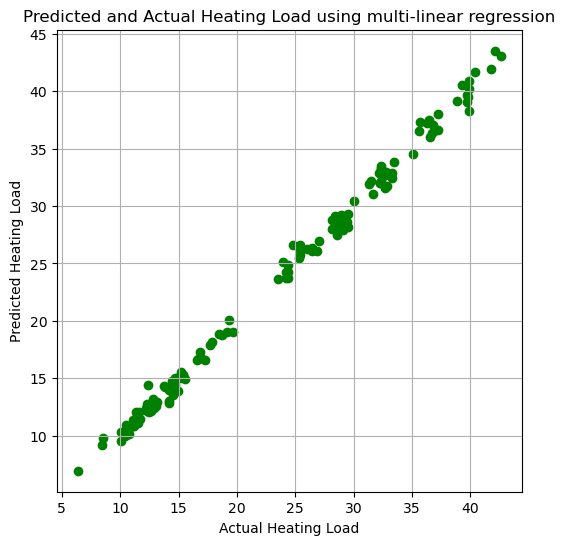

In [25]:
createPolyRegression(5)

The accuracy in r2_score is 0.9962260960246815
The mse is 0.3754001114195161
The mae is 0.41013977264313034


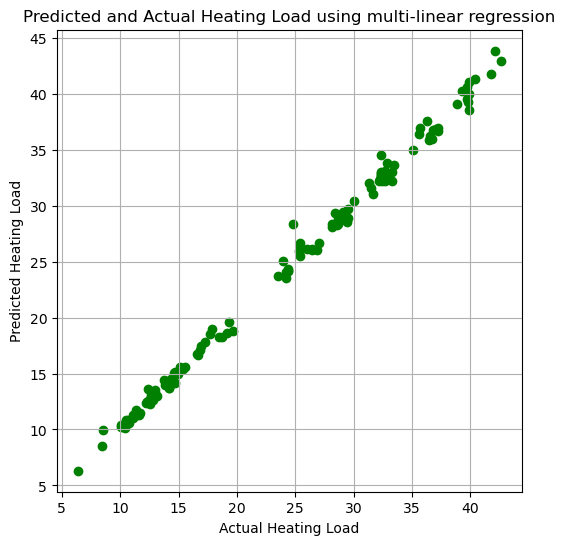

In [26]:
createPolyRegression(12)

### ● Compare the performance of the multi-linear regression and polynomial regression models based on the MSE and R^2 values.

R^2 values ====
Comparing the R-squared values of two models can give us an indication of which model provides a better fit to the data. A higher R-squared value indicates that a larger proportion of the variation in the dependent variable is accounted for by the independent variables.


MSE ==== The one with the lower MSE would have better generalization properties, and thus it would be closer to the true data generating process.

##### In the case of Polynominal Multivariant Regression the following was output. 
##### The accuracy in r2_score is 0.9976447539766983
##### The mse is 0.23603141998167262
##### The mae is 0.3467176731046918

##### However, in the case of multi-linear regression, the accuracy dropped to 90%, and there  was in increase in MSE and MAE value

##### The accuracy in r2_score is 0.9091031012383393
##### The mse is 9.109249681088029
##### The mae is 2.16164960548948


##### Thus in the nutshell, the performance of Polynominal Multivariant Regression  model is much better then  multi-linear regression model...
